## <center> Assignment 01
## <center> Course: ML1    
## <center> Instructor: Dr. Tariq Mahmood

### <center> Submitted By:
#### <center> Muhammad Uzair 29414
#### <center> Areeb Asif 14101

https://github.com/muhammaduzair99/ML-1.git

#### <center> 
#### <center> Iranian Churn Datasethttps://archive.ics.uci.edu/dataset/563/iranian+churn+dataset



This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

| Attribute Name          | Role       | Type       | Description                                            | Units | Missing Values |
|-------------------------|------------|------------|--------------------------------------------------------|-------|----------------|
| Anonymous Customer ID   | Identifier | Categorical| Unique identifier for each customer                    |       | no             |
| Call Failures           | Feature    | Integer    | Number of call failures                                |       | no             |
| Complains               | Feature    | Binary     | Indicates whether the customer made a complaint         |       | no             |
| Subscription Length     | Feature    | Integer    | Total months of subscription                           |       | no             |
| Charge Amount           | Feature    | Ordinal    | Ordinal attribute indicating the charge amount         |       | no             |
| Seconds of Use          | Feature    | Continuous | Total seconds of calls                                 |       | no             |
| Frequency of Use        | Feature    | Integer    | Total number of calls                                  |       | no             |
| Frequency of SMS        | Feature    | Integer    | Total number of text messages                          |       | no             |
| Distinct Called Numbers| Feature    | Integer    | Total number of distinct phone calls                   |       | no             |
| Age Group               | Feature    | Ordinal    | Ordinal attribute indicating the age group            |       | no             |
| Tariff Plan             | Feature    | Binary     | Indicates the type of tariff plan                      |       | no             |
| Status                  | Feature    | Binary     | Indicates whether the customer is active or non-active |       | no             |
| Churn                   | Target     | Binary     | Indicates whether the customer churned or not           |       | no             |
| Customer Value          | Feature    | Continuous | The calculated value of the customer                   |       | no             |


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder


In [11]:
# file path
filepath = 'customer churn.csv'
target = 'Churn'

In [12]:

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def clean_data(df):
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df):
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

def transform_data1(df):
    binary_categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() == 2:
            binary_categorical_cols.append(col)

    for col in binary_categorical_cols:
        df[col] = df[col].map({'yes': True, 'no': False, 'Male': True, 'Female': False})
        
    return df

def eda(df):
    summary_stats = df.describe()
    float_cols = df.select_dtypes(include=['float64']).columns
    
    num_cols = len(float_cols)
    num_rows = (num_cols + 2) // 3
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


def manual_split(df, target_column):
    if isinstance(target_column, list):
        target_column = target_column[0]
    
    # One-hot encoding for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Check if the target column is in the list of categorical columns
    if target_column in categorical_cols:
        # Remove the target column from the list of categorical columns
        categorical_cols.remove(target_column)
    else:
        print(f"Target column '{target_column}' is not found in the DataFrame's categorical columns.")
    
    # Perform one-hot encoding excluding the target column
    df = pd.get_dummies(df, columns=categorical_cols)

    # Label encoding for the target variable
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[target_column]),
        df[target_column],
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test
    

def model_selection():
    model = KNeighborsClassifier()
    return model
    
def cv_scores(model,X_train, y_train):  
    # Example: KNN Classifier
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores
    
def train_model(model,X_train,y_train):
    model.fit(X_train, y_train)

def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    if len(np.unique(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if len(np.unique(y_test)) > 2:
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc_dict = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
            roc_auc_dict[i] = auc(fpr[i], tpr[i])

            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (class {})'.format(i))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve - Class {}'.format(i))
            plt.legend(loc="lower right")
            plt.show()
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_rep)
    print("\nROC AUC Score:")
    print(roc_auc)



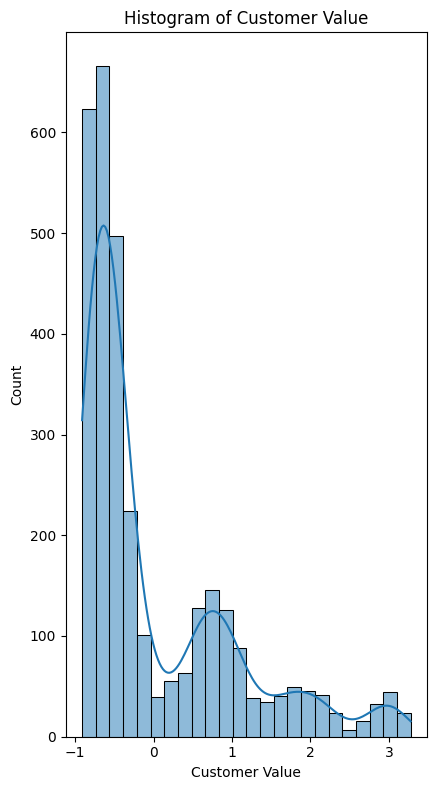

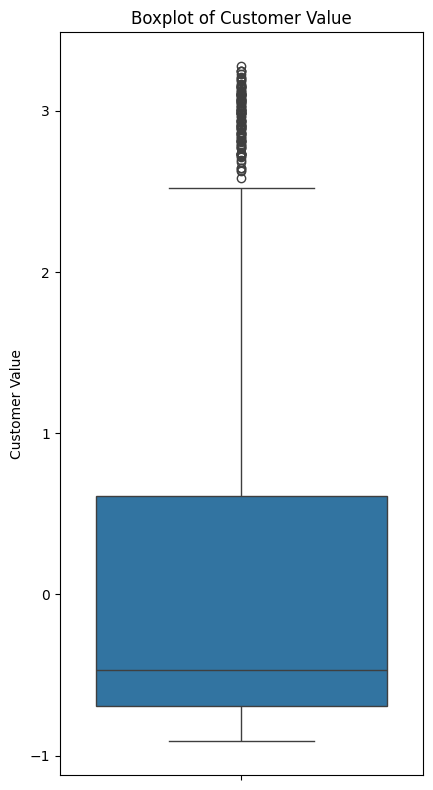

Target column 'Churn' is not found in the DataFrame's categorical columns.


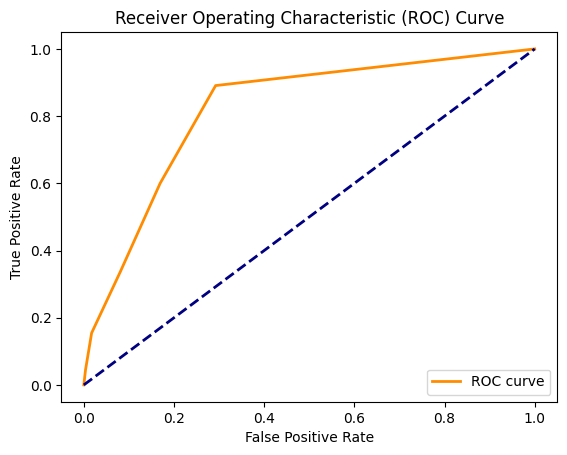


Evaluation Metrics:
Accuracy: 0.8174603174603174

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       520
           1       0.47      0.34      0.39       110

    accuracy                           0.82       630
   macro avg       0.67      0.63      0.64       630
weighted avg       0.80      0.82      0.81       630


ROC AUC Score:
0.8192657342657341


In [13]:
# def master_pipeline(filepath, target_column):
#     print("Target Column:", target_column)
#     # rest of the code...

def master_pipeline(filepath,target):
    df = load_data(filepath)
    df = clean_data(df)
    df = transform_data(df)
    df = transform_data1(df)
    eda(df)
    X_train, X_test, y_train, y_test = manual_split(df, target)
    model = model_selection()
    cv_scores(model,X_train, y_train)
    train_model(model, X_train, y_train)
    evaluate_model(model, X_test, y_test)

# Example usage:
master_pipeline(filepath,target)



The evaluation metrics provide insights into the performance of the KNN classifier:

Accuracy: The accuracy of the classifier is 81.75%, indicating that it correctly predicts the class label for approximately 81.75% of the instances in the test set.

Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0, the precision is 0.87, which means that 87% of the instances predicted as class 0 are actually class 0. For class 1, the precision is lower at 0.47, indicating that only 47% of the instances predicted as class 1 are actually class 1.

Recall: Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances. For class 0, the recall is high at 0.92, indicating that 92% of all actual class 0 instances are correctly predicted as class 0. However, for class 1, the recall is lower at 0.34, suggesting that only 34% of all actual class 1 instances are correctly predicted as class 1.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is high at 0.89, indicating a good balance between precision and recall. For class 1, the F1-score is lower at 0.39, suggesting a trade-off between precision and recall.

ROC AUC Score: The ROC AUC score is 0.819, which indicates that the classifier performs reasonably well in distinguishing between the two classes. A score closer to 1.0 suggests better performance.

Overall, the KNN classifier demonstrates decent performance, particularly in predicting class 0, where it achieves high accuracy, precision, recall, and F1-score. However, there is room for improvement, especially in predicting class 1, where the precision, recall, and F1-score are relatively lower.